# Random Forests

In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [3]:
from sklearn.ensemble import RandomForestRegressor

In [4]:
rf_model = RandomForestRegressor(random_state=42)

In [5]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Tahmin

In [6]:
rf_model.predict(X_test)[0:5]

array([ 738.69167,  913.51164, 1181.145  ,  139.65167,  634.60833])

In [7]:
y_pred = rf_model.predict(X_test)

In [8]:
np.sqrt(mean_squared_error(y_test, y_pred))

344.8191624908484

## Model Tuning

In [12]:
rf_params = {'max_depth': list(range(1, 10)),
            'max_features': [3, 5, 10, 15],
            'n_estimators': [100, 200, 500, 1000, 2000]}

In [13]:
rf_model = RandomForestRegressor(random_state = 42)

In [15]:
rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10,
                           n_jobs = -1)

In [16]:
rf_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [3, 5, 10, 15],
                         'n_estimators': [100, 200, 500, 1000, 2000]})

In [20]:
# n_jobs = -1 diyerek işlemcinin tüm çekirdekleri kullanarak
# tam performansta çalışmasını sağlarız. Bu sayede yazdığımız
# kod çok hızlı çalışır.

In [21]:
rf_cv_model.best_params_

{'max_depth': 8, 'max_features': 3, 'n_estimators': 200}

In [27]:
rf_tuned = RandomForestRegressor(max_depth = 8, 
                                 max_features = 3, 
                                 n_estimators = 200)

In [28]:
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, max_features=3, n_estimators=200)

In [29]:
y_pred = rf_tuned.predict(X_test)

In [31]:
np.sqrt(mean_squared_error(y_test, y_pred))

340.0175964641714

In [32]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

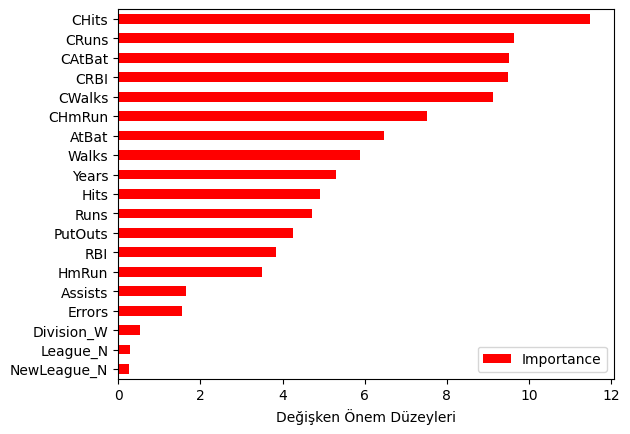

In [34]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind="barh", color="r")

plt.xlabel("Değişken Önem Düzeyleri")